<a href="https://colab.research.google.com/github/yashtalekar/PokemonClassifier/blob/main/COMP4702_final_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
!pip install sklearn
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.5.0


In [45]:
# This is to mount Google Drive to get data.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [46]:
# Read this data with pd.
dataframe = pd.read_csv('/content/gdrive/My Drive/COMP4702_final/penguins_size.csv')
# Verify data loaded properly.
dataframe.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [47]:
# The number of rows with missing values
dataframe.isnull().any(axis = 1).sum()

10

This shows that there are 10 rows with missing values.

In [48]:
# Now we drop rows with any missng values.
df = dataframe.dropna()
# The output for the following should be 0.
df.isnull().any(axis = 1).sum()

0

In [49]:
species_labels = {"Adelie":0, "Chinstrap":1, "Gentoo": 2}
# Convert the species to int. This column is called target
df['target'] = df.apply(lambda row: species_labels[row.species], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


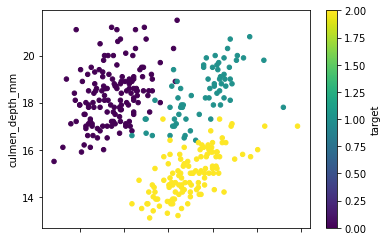

In [50]:
# Now a scatter plot of culmen length vs culmen depth
ax2 = df.plot.scatter(x='culmen_length_mm',

                      y='culmen_depth_mm',

                      c='target',

                      colormap='viridis')

In [51]:
# Put a histogram here.

In [56]:
# Naive Bayes classifier

train, test = train_test_split(df, test_size=0.2)

x_train = train.iloc[:, 2:6].values
y_train = train['target'].values

x_test = test.iloc[:, 2:6].values
y_test = test['target'].values


In [58]:
from sklearn.naive_bayes import GaussianNB
NBclassifier = GaussianNB()
NBclassifier.fit(x_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [59]:
y_pred = NBclassifier.predict(x_test)

In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_test, y_pred))
cm

Accuracy:  0.9552238805970149


array([[23,  2,  0],
       [ 1, 15,  0],
       [ 0,  0, 26]])